In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
import joblib

In [57]:
df = pd.read_csv('spambase.data', sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [58]:
columns = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
           "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
           "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
           "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
           "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
           "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
           "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
           "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
           "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
           "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
           "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
           "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average",
           "capital_run_length_longest", "capital_run_length_total", "spam"]

In [59]:
df.columns = columns
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [60]:
df['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

In [61]:
X = df.drop('spam', axis=1).values
Y = df['spam'].values

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [68]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

joblib.dump(sc, 'saved_scaler.joblib')

['saved_scaler.joblib']

## SVC

In [69]:
model = SVC(C=1)
model.fit(x_train, y_train)

SVC(C=1)

In [70]:
y_preds = model.predict(x_test)
print(f"Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       531
           1       0.95      0.89      0.92       390

    accuracy                           0.93       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.93      0.93       921



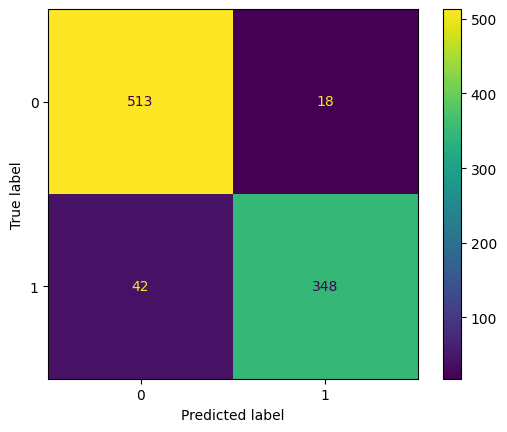

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

### Cross Validation and Grid Search

In [72]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)

model = SVC(C=1)

In [73]:
cv_results = cross_val_score(model, x_train, y_train, cv=folds, scoring='accuracy')

In [74]:
print(cv_results)
print(f"Mean accuracy: {cv_results.mean()}")

[0.93342391 0.93342391 0.92663043 0.91032609 0.93206522]
Mean accuracy: 0.9271739130434783


In [75]:
params = {
    "C": [0.1, 1, 10, 100, 1000]
}

model = SVC()

model_cv = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring="accuracy",
    cv=folds,
    verbose=3,
    return_train_score=True
  )

In [76]:
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .........C=0.1;, score=(train=0.908, test=0.910) total time=   0.4s
[CV 2/5] END .........C=0.1;, score=(train=0.907, test=0.904) total time=   0.4s
[CV 3/5] END .........C=0.1;, score=(train=0.906, test=0.906) total time=   0.4s
[CV 4/5] END .........C=0.1;, score=(train=0.913, test=0.897) total time=   0.4s
[CV 5/5] END .........C=0.1;, score=(train=0.910, test=0.904) total time=   0.6s
[CV 1/5] END ...........C=1;, score=(train=0.944, test=0.933) total time=   0.4s
[CV 2/5] END ...........C=1;, score=(train=0.947, test=0.933) total time=   0.4s
[CV 3/5] END ...........C=1;, score=(train=0.943, test=0.927) total time=   0.4s
[CV 4/5] END ...........C=1;, score=(train=0.948, test=0.910) total time=   0.3s
[CV 5/5] END ...........C=1;, score=(train=0.944, test=0.932) total time=   0.3s
[CV 1/5] END ..........C=10;, score=(train=0.966, test=0.942) total time=   0.3s
[CV 2/5] END ..........C=10;, score=(train=0.967,

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [77]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.342902,0.054576,0.108138,0.030336,0.1,{'C': 0.1},0.910326,0.903533,0.906250,0.896739,...,0.904076,0.004432,5,0.907948,0.906590,0.905571,0.913043,0.910326,0.908696,0.002695
1,0.283754,0.052569,0.087613,0.023555,1,{'C': 1},0.933424,0.933424,0.926630,0.910326,...,0.927174,0.008789,2,0.943954,0.946671,0.943274,0.948370,0.944293,0.945312,0.001909
2,0.205235,0.005756,0.051590,0.005294,10,{'C': 10},0.941576,0.927989,0.922554,0.919837,...,0.929891,0.008402,1,0.966372,0.966712,0.965353,0.967731,0.962636,0.965761,0.001737
3,0.283699,0.011080,0.042860,0.001088,100,{'C': 100},0.930707,0.925272,0.918478,0.911685,...,0.923098,0.007117,3,0.985734,0.987432,0.988791,0.988111,0.985394,0.987092,0.001324
4,0.379434,0.019017,0.041051,0.005483,1000,{'C': 1000},0.922554,0.919837,0.911685,0.904891,...,0.914130,0.006338,4,0.992527,0.994226,0.993207,0.994565,0.993546,0.993614,0.000725


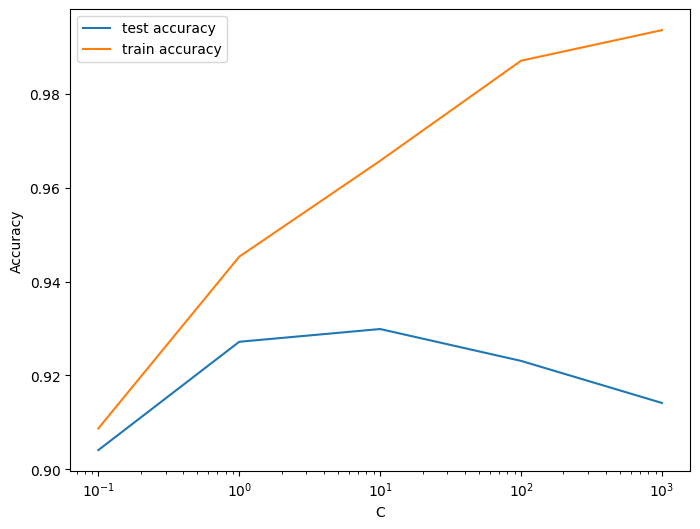

In [78]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [79]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(f"The highest test accuracy is {best_score} at C = {best_C}")

The highest test accuracy is 0.9298913043478262 at C = 10


In [80]:
model = SVC(C=best_C)
model.fit(x_train, y_train)

SVC(C=10)

In [81]:
y_preds = model.predict(x_test)
print(f"Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       531
           1       0.95      0.89      0.92       390

    accuracy                           0.94       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.94      0.94       921



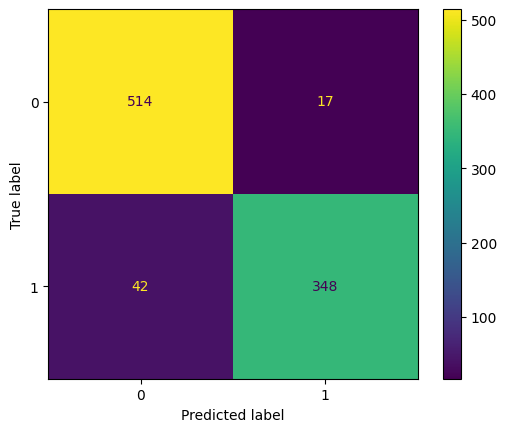

In [82]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

## Logistic Regression

In [83]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [84]:
y_preds = model.predict(x_test)
print(f"Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



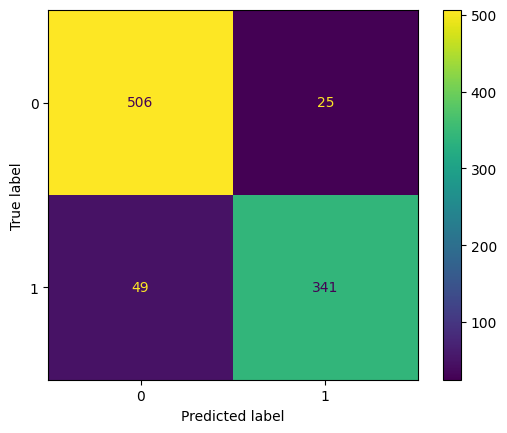

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [86]:
joblib.dump(model, 'saved_model.joblib')

['saved_model.joblib']